In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
clean = pd.read_csv(os.path.join('Data', 'SFDO_504_7A-clean.csv'))

In [4]:
clean2 = pd.read_csv(os.path.join('Data', 'Clean.csv'), 
                   dtype={'CDC_Street': str, 'CDC_City': str, 'CDC_Name': str,
                          'CDC_State': str, 'ThirdPartyLender_State': str,
                          'ThirdPartyLender_City': str, 'ThirdPartyLender_Name': str})

In [5]:
clean.shape

(44186, 39)

In [6]:
clean2.shape

(44178, 44)

In [2]:
clean3 = pd.read_csv(os.path.join('Data', 'sba_google_places_loan_data.csv'))

In [21]:
clean3.columns

Index([u'cartodb_id', u'the_geom', u'borrname', u'borrstreet', u'borrcity',
       u'borrstate', u'full_address', u'citylat', u'citylon',
       u'congressionaldistrict', u'program', u'borrzip', u'cdc_zip',
       u'grossapproval', u'approvalfiscalyear', u'terminmonths', u'naicscode',
       u'franchisecode', u'grosschargeoffamount', u'jobssupported',
       u'googlename', u'places_url', u'googleplaceslon', u'googleplaceslat',
       u'googletype', u'googleid', u'googlerating', u'googlestatus',
       u'dstkaddress', u'dstklatitude', u'dstklong', u'dstkstreet',
       u'dstkconfidence', u'dstkcity', u'mashlat', u'mashlon', u'cdc_name',
       u'cdc_street', u'cdc_city', u'cdc_state', u'thirdpartylender_name',
       u'thirdpartylender_city', u'thirdpartylender_state',
       u'thirdpartydollars', u'sbaguaranteedapproval', u'approvaldate',
       u'firstdisbursementdate', u'deliverymethod', u'subpgmdesc',
       u'initialinterestrate', u'naicsdescription', u'franchisename',
       u'pro

In [3]:
clean3['name'] = clean3['googlename'].fillna(clean3['borrname'])

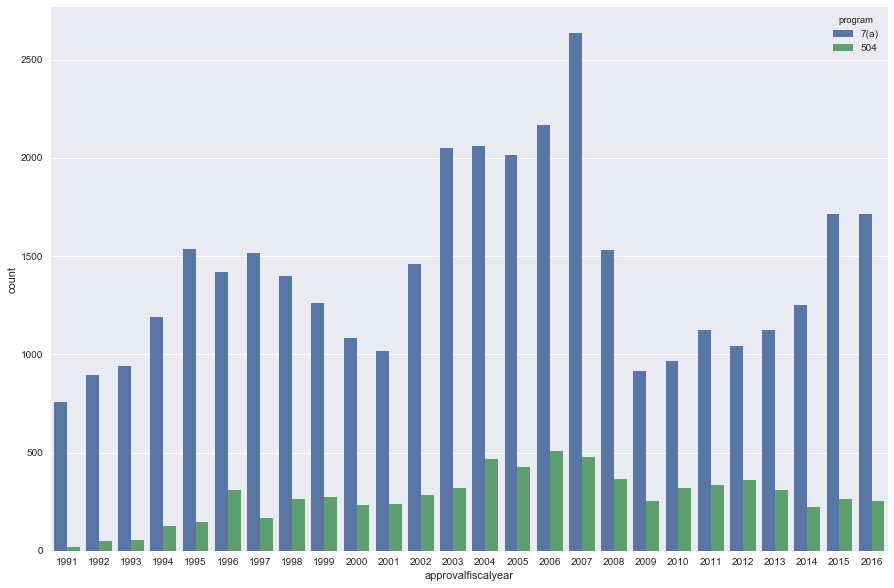

In [98]:
plt.figure(figsize = (15, 10))
sns.countplot('approvalfiscalyear', data=clean3, hue = 'program')

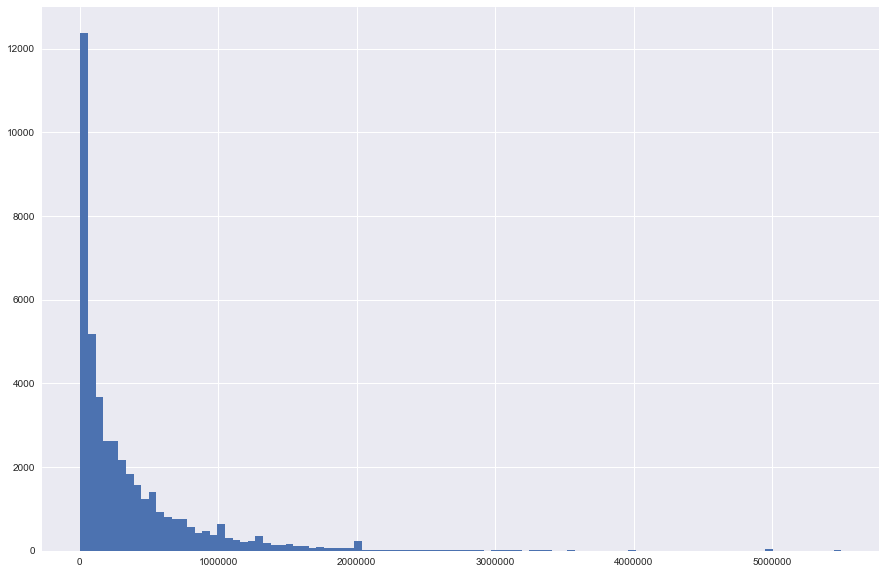

In [120]:
plt.figure(figsize = (15, 10))
clean3['grossapproval'].hist(bins=100)

**`grossapproval`**

In [134]:
clean3['grossapproval'].value_counts(normalize = True)[:10]

50000     0.061049
100000    0.046261
10000     0.041240
25000     0.034393
150000    0.030262
5000      0.021019
20000     0.020837
15000     0.020220
30000     0.017413
35000     0.015656
Name: grossapproval, dtype: float64

**`jobssupported`** has zero for 30% of the records. This might mean that these are all in fact nulls. 

In [129]:
clean3['jobssupported'].value_counts(normalize=True)[:20]

0     0.300614
2     0.091996
1     0.072871
3     0.069471
4     0.064747
5     0.054340
6     0.043933
10    0.034256
8     0.029737
7     0.028459
12    0.016866
9     0.016660
15    0.015747
20    0.015131
11    0.010498
14    0.009540
13    0.008878
16    0.008170
30    0.007896
25    0.007212
Name: jobssupported, dtype: float64

Get Yelp reviews:

In [4]:
import requests
from bs4 import BeautifulSoup
import pprint
    
data = {'grant_type': 'client_credentials',
        'client_id': 'kiD4d8ra_jebdWlH9XZyLw',
        'client_secret': 'yAm96WC7WVyKhCUobTu0YX3nl5EqmlnVQnQrdRMomrMCDg4auhg7aK9QJyEIyUIm'}
token = requests.post('https://api.yelp.com/oauth2/token', data=data)
access_token = token.json()['access_token']
url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': 'bearer %s' % access_token}

In [5]:
clean3['yelp_rating'] = None
clean3['yelp_total_reviews'] = None
clean3['yelp_url'] = None

In [8]:
for i in range(25000, len(clean3)):
    address = clean3.iloc[i]['full_address']
    name = clean3.iloc[i]['name']
    params = {'location': address,
              'term': name,
              'radius': 100,
              'limit':1
              }

    resp = requests.get(url=url, params=params, headers=headers)

    try:
        clean3['yelp_rating'].loc[i] = resp.json()['businesses'][0]['rating']
        clean3['yelp_total_reviews'].loc[i] = resp.json()['businesses'][0]['review_count']
        clean3['yelp_url'].loc[i] = resp.json()['businesses'][0]['url']
    except:
        pass

In [9]:
clean3[clean3['yelp_rating'].notnull()][['yelp_rating', 'yelp_total_reviews']]

,yelp_rating,yelp_total_reviews
10,4,137
16,4,32
33,4.5,20
59,5,5
72,3.5,34
97,2.5,74
100,4.5,3
102,4.5,3
110,2,10
116,3,2
